In [ ]:
#  Пока не доделано. Прошу не проверять. :)

In [ ]:
#  21 января утром будет готово

In [ ]:
# Проектная работа по модулю “Построение моделей”
# В данной работе предлагается решить задачу бинарной 
# классификации на большом признаковом множестве для 
# датасета банка Santader (https://www.santanderbank.com/us/personal)

# 1. Загрузить данные 
# 2. Провести описательный анализ предложенных данных
# 3. Провести анализ корреляции переменных, отобразить взаимосвязи между переменными
# 4. Провести стратегию Feature Selection (попробовать как минимум два различных подхода)
# 5. Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?
# 6. Попробовать стратегию oversamling и сравнить ее с неизмененной моделью
# 7. Попробовать стратегию undersampling и сравнить ее с неизмененной моделью
# 8. Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)
# 9. Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGET)
# 10. Рассчитать Feature Importances для переменных модели
# 11. Проверить качество классификации с использованием следующих метрик:
#     Accuracy, F1-Score, Precision, Recall
# 12. Построить Confusion Matrix для ваших результатов
# 13. Загрузить ipython notebook с результатами работы на github репозиторий


In [ ]:
## Импорт библиотек

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy
from scipy import stats

In [4]:
## 1. Загрузить данные 

In [4]:
data_raw = pd.read_csv('train.csv')
data_raw.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
## 2. Провести описательный анализ предложенных данных

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
data_raw.describe()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
## 3. Провести анализ корреляции переменных, отобразить взаимосвязи между переменными

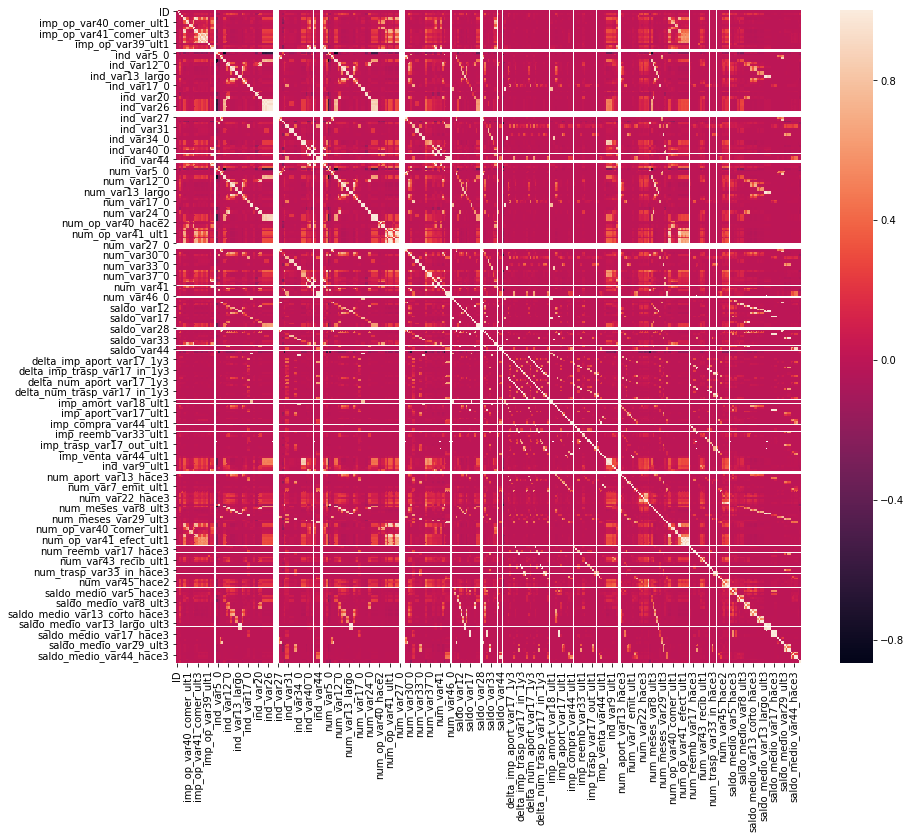

In [9]:
matplotlib.rcParams['figure.figsize'] = (14, 12)
corr = data_raw.corr()
sns.heatmap(corr)

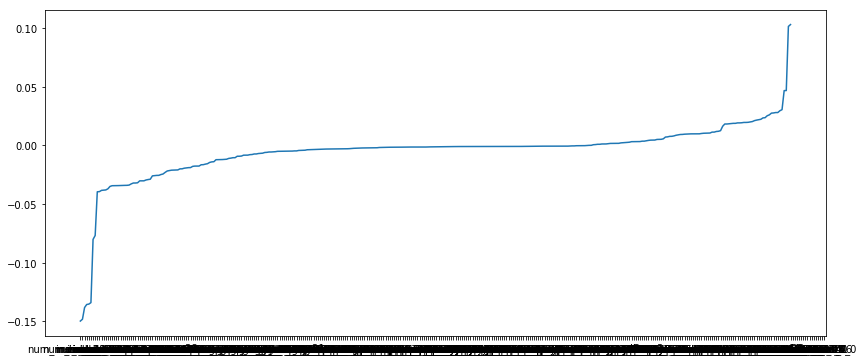

In [10]:
matplotlib.rcParams['figure.figsize'] = (14, 6)
plt.plot(corr['TARGET'].drop('TARGET').sort_values())

In [12]:
keys = set(data_raw.keys()) - set(['TARGET', 'ID'])
#print(keys)
for key in list(keys):
    print('Param: ', key)
    print(stats.ttest_ind(data_raw[data_raw['TARGET'] == 0][key],data_raw[data_raw['TARGET'] == 1][key]))

Param:  num_var29_0
Ttest_indResult(statistic=0.5741228978623396, pvalue=0.5658863381078045)
Param:  delta_imp_trasp_var33_in_1y3
Ttest_indResult(statistic=0.4538746778856217, pvalue=0.6499203258606987)
Param:  num_var22_hace2
Ttest_indResult(statistic=-2.6990576283832515, pvalue=0.00695515008915717)
Param:  imp_reemb_var13_ult1
Ttest_indResult(statistic=-0.46249504528891305, pvalue=0.6437276783758592)
Param:  imp_reemb_var13_hace3
Ttest_indResult(statistic=nan, pvalue=nan)
Param:  num_var45_ult1
Ttest_indResult(statistic=-2.207883366613963, pvalue=0.027255379012369487)
Param:  delta_imp_reemb_var33_1y3
Ttest_indResult(statistic=0.20297336632317486, pvalue=0.8391563927266859)
Param:  num_op_var39_ult3
Ttest_indResult(statistic=-2.831978054774434, pvalue=0.0046273178390384756)
Param:  imp_aport_var13_hace3
Ttest_indResult(statistic=5.785471315044153, pvalue=7.259192024934694e-09)
Param:  ind_var37
Ttest_indResult(statistic=-0.8813786419471629, pvalue=0.37811570044135356)
Param:  num_mes

Ttest_indResult(statistic=-5.00668353685805, pvalue=5.549939344007027e-07)
Param:  num_var13_medio
Ttest_indResult(statistic=0.287049653258787, pvalue=0.7740750837974455)
Param:  num_var1
Ttest_indResult(statistic=-2.6132358157222115, pvalue=0.008970705315100998)
Param:  imp_var43_emit_ult1
Ttest_indResult(statistic=1.1748577821498702, pvalue=0.24005529835171974)
Param:  num_var6_0
Ttest_indResult(statistic=0.5741228978623396, pvalue=0.5658863381078045)
Param:  num_var25
Ttest_indResult(statistic=-5.1629131251245965, pvalue=2.437467740361463e-07)
Param:  ind_var37_0
Ttest_indResult(statistic=-0.8813786419471629, pvalue=0.37811570044135356)
Param:  saldo_var17
Ttest_indResult(statistic=0.21351367231281781, pvalue=0.8309268986187839)
Param:  num_op_var39_efect_ult1
Ttest_indResult(statistic=-6.007424979750465, pvalue=1.8934624042128616e-09)
Param:  num_var35
Ttest_indResult(statistic=21.25767626608649, pvalue=5.480917479919971e-100)
Param:  num_var22_hace3
Ttest_indResult(statistic=0.787

Ttest_indResult(statistic=1.9314877844803269, pvalue=0.053426471124671436)
Param:  num_var32
Ttest_indResult(statistic=0.0934218872452156, pvalue=0.9255686492491125)
Param:  ind_var6_0
Ttest_indResult(statistic=0.5741228978623394, pvalue=0.565886338107805)
Param:  saldo_medio_var5_ult1
Ttest_indResult(statistic=4.3199377474319185, pvalue=1.5627087359868845e-05)
Param:  num_var13
Ttest_indResult(statistic=10.595200563674101, pvalue=3.2716762432058726e-26)
Param:  num_op_var41_hace3
Ttest_indResult(statistic=0.32945803130308615, pvalue=0.7418104187089483)
Param:  num_trasp_var11_ult1
Ttest_indResult(statistic=2.5714676577987947, pvalue=0.01012873020339466)
Param:  num_var37
Ttest_indResult(statistic=-0.45073922966049135, pvalue=0.65217879039559)
Param:  num_var20_0
Ttest_indResult(statistic=3.378415313726034, pvalue=0.0007294145941238726)
Param:  imp_ent_var16_ult1
Ttest_indResult(statistic=0.0048140297647381244, pvalue=0.9961589874434942)
Param:  num_aport_var17_hace3
Ttest_indResult(st

Ttest_indResult(statistic=nan, pvalue=nan)
Param:  num_var24
Ttest_indResult(statistic=8.865815662527934, pvalue=7.754369250739989e-19)
Param:  saldo_var32
Ttest_indResult(statistic=-0.1711557836796994, pvalue=0.8641017294506993)
Param:  ind_var29_0
Ttest_indResult(statistic=0.5741228978623394, pvalue=0.565886338107805)
Param:  imp_op_var39_efect_ult1
Ttest_indResult(statistic=-8.380119851423277, pvalue=5.37625100340932e-17)
Param:  num_var45_hace2
Ttest_indResult(statistic=0.2718094544962115, pvalue=0.785769273333877)
Param:  ind_var33
Ttest_indResult(statistic=1.4066935765973734, pvalue=0.15952235930146877)
Param:  delta_num_reemb_var13_1y3
Ttest_indResult(statistic=0.4191725473209272, pvalue=0.6750912182354123)
Param:  ind_var17
Ttest_indResult(statistic=1.1514492236155958, pvalue=0.24955109465964895)
Param:  ind_var41_0
Ttest_indResult(statistic=9.420889417779494, pvalue=4.5927865010816365e-21)
Param:  num_var30
Ttest_indResult(statistic=38.49806284706314, pvalue=0.0)
Param:  ind_v

Ttest_indResult(statistic=0.936033386648503, pvalue=0.3492589716710749)
Param:  saldo_medio_var17_hace2
Ttest_indResult(statistic=0.3314784397183493, pvalue=0.7402840377037205)
Param:  ind_var20
Ttest_indResult(statistic=2.9102048846284707, pvalue=0.003612966439636523)
Param:  delta_num_venta_var44_1y3
Ttest_indResult(statistic=1.3157872539549713, pvalue=0.18824942650608734)
Param:  num_aport_var33_hace3
Ttest_indResult(statistic=0.8559744550350602, pvalue=0.3920146073303201)
Param:  saldo_medio_var13_corto_hace2
Ttest_indResult(statistic=6.368893907465864, pvalue=1.9147944905653615e-10)
Param:  saldo_var24
Ttest_indResult(statistic=5.947965658257709, pvalue=2.7267772161338897e-09)
Param:  num_var25_0
Ttest_indResult(statistic=-5.1629131251245965, pvalue=2.437467740361463e-07)
Param:  ind_var7_recib_ult1
Ttest_indResult(statistic=-0.3187344656220874, pvalue=0.7499287525942125)
Param:  saldo_medio_var33_hace3
Ttest_indResult(statistic=0.6703972136668181, pvalue=0.5026066469653758)
Param

In [13]:
# Для проверки различных вариантов будем использовать следующие типы подготовки данных
#
#  1. Feature Selection
#    3. Данные шкалируем данные с помощью стандартизации и нормализации
#       получим 3 датасета  data ,  data_st и data_norm
#
#    Уменьшение размерности   
#    1.1 PCA (датасеты с постфиксом _pca)
#    1.2 Отбор признаков в зависимости от коэффициента в построенной регрессии по двум уровням 
#        0.5 и по уровню самого резкого падения коэффициента (датасет с постфиксом _min1, _min2)
#    Увеличение размерности
#    1.3 Сгенерируем новые признаки декартовым произведением признаков (датасет с постфиксом _max1)
#    1.4 Отберем из сгенерированных признаков в зависимости от коэффициента в построенной 
#        регрессии (датасет с постфиксом _max2)
#
#  2. Используем стратегию oversamling и undersampling
#    2.1 Проведем undersampling удалеинем части примеров мажоритарного класса
#        получим датасеты с постфиксом _under)   
#    2.2 Проведем oversampling дублирование части примеров минорного класса
#        получим датасеты с постфиксом _over)
#
#  
#
#     Получим 33 датасета 

In [ ]:
y = data_raw['TARGET']
data = data_raw.drop(columns=['TARGET', 'ID'])

In [ ]:
## 4. Провести стратегию Feature Selection (попробовать как минимум два различных подхода)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_sc = sc.fit_transform(data1)



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99).fit(train_sc)
train_pca = pca.transform(train_sc)


In [ ]:
## 5. Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?

In [ ]:
## 6. Попробовать стратегию oversamling и сравнить ее с неизмененной моделью

In [ ]:
## 7. Попробовать стратегию undersampling и сравнить ее с неизмененной моделью

In [ ]:
## 8. Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)

In [ ]:
## 9. Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGET)

In [ ]:
## 10. Рассчитать Feature Importances для переменных модели

In [ ]:
## 11. Проверить качество классификации с 
##     использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [ ]:
## 12. Построить Confusion Matrix для ваших результатов

In [ ]:
## 13. Загрузить ipython notebook с результатами работы на github репозиторий